In [36]:
%run "../../../common/0_notebooks_base_setup.py"    

/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


#### Distribución Uniforme

##### Distribución Uniforme Discreta

Decimos que una variable aleatoria X tiene una distribución uniforme discreta sobre el conjunto de n números {x1, x2, ..., xn} si **la probabilidad de que X tome cualquiera de estos valores es constante 1/n**. 

Esta distribución surge en espacios de probabilidad **equiprobables**, esto es, en situaciones en donde tenemos n resultados diferentes y todos ellos tienen la misma probabilidad de ocurrir.

Se escribe 

$X \sim \text{unif}\{x_1, x_2, ..., x_n\} $

en donde el símbolo "$\sim$" se lee "se distribuye como" o "tiene una distribución".

La distribución de probabilidad de esa variable aleatoria es:

\begin{equation}
  f(x)=\begin{cases}
    1/n, & \text{si x = $x_1, x_2, ..., x_n$}\\
    0, & \text{en otro caso}.
  \end{cases}
\end{equation}


<!--![Image](img/prob_uniforme_discreta.png)-->
<img src="img/prob_uniforme_discreta.png" width="500"/>

\begin{equation}
n = 5  \text{    donde    } n = b − a + 1
\end{equation}

**Ejemplos**:

* X: puntuación en el lanzamiento de un dado regular

* X: resultado del lanzamiento de una moneda

* X: resultado de un juego de lotería


#### Distribución Uniforme Continua

Decimos que una variable aleatoria X tiene una distribución uniforme continua en el intervalo (a,b), donde a y b son números reales, si su función de densidad es 

\begin{equation}
  f_X(x)=\begin{cases}
    \frac{1}{b-a}, & \text{si $a \lt x \lt b$} \\
    0, & \text{en otro caso}.
  \end{cases}
\end{equation}

a y b son los parámetros de la distribución uniforme continua.

La distribución uniforme asigna probabilidad positiva constante y mayor a cero sólo a valores de la variable aleatoria en determinado rango.

\begin{equation}
  F_X(x)=\begin{cases}
    0, & \text{si $x \lt a$} \\
    \frac{x - a}{b - a}, & \text{si $a \le x \lt b$} \\
    1, & \text{si $x \ge b$}
  \end{cases}
\end{equation}


<img src="img/prob_uniforme_continua.png" width="500"/>

**Ejemplos**:

* Una llamada telefónica llegó a in conmutador en un tiempo, al azar, dentro de un período de 1 minuto. El conmutador estuvo ocupado durante 15 segundos en ese minuto. ¿Cuál es la probabilidad de que la llamada haya llegado mientras el conmutador no estuvo ocupado?

* Dos amigos deben encontrarse en una parada de colectivo entre las 9:00 y las 10:00. Cada uno esperará un máximo de 10 minutos. ¿Cuál es la probabilidad de que no se encuentren si el amigo1 llegará a las 9:30?

---

Vamos a ver ahora cómo generar datos con estas distibuciones de probabilidad.

Necesitamos un generador de números aleatorios, que expone métodos para generar números aleatorios con alguna distribución de probabilidad especificada. Construimos este generador de este modo `np.random.default_rng()`

https://docs.scipy.org/doc/numpy/reference/random/generator.html

Estas son las distribuciones de probabilidad disponibles:
https://docs.scipy.org/doc/numpy/reference/random/generator.html#distributions

Para generar datos con distribución **uniforme discreta** emplearemos el método `choice`

https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.choice.html

Para generar datos con distribución **uniforme continua** emplearemos el método `uniform`

https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform


In [2]:
import numpy as np
random_generator = np.random.default_rng()
random_uniform_cont_data = random_generator.uniform(low = 3, high = 17, size = 30)

possible_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random_uniform_disc_data = random_generator.choice(possible_values, size = 30)

Usando la función `distribution_plotter` vamos a graficar los valores generados

In [3]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue', 
                         bins='auto', binrange=None, binwidth=0.5 ):    
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")    
    dist = sns.histplot(data, bins= bins, stat = 'density', kde = True, line_kws={'linewidth':5}, 
                        color = color, thresh = None, 
                        binrange = binrange, binwidth=binwidth)
    dist.set_title('Distribucion ' + label + '\n', fontsize=16)


[10.78887302  5.4267113  12.73610724 16.88812867  8.51694432 16.01046296
  6.87905703  7.71850246 16.3952434   3.2843088  15.70216906  6.25083875
  4.74117306 15.56696653 15.64765643  7.73634606  4.01161513  5.40047649
 11.11552855 15.52959057 13.94712723 13.24206206  6.99026791  3.7501708
 14.39654975 10.37836117  4.02664242  4.52927784 15.90608326 16.96053427]


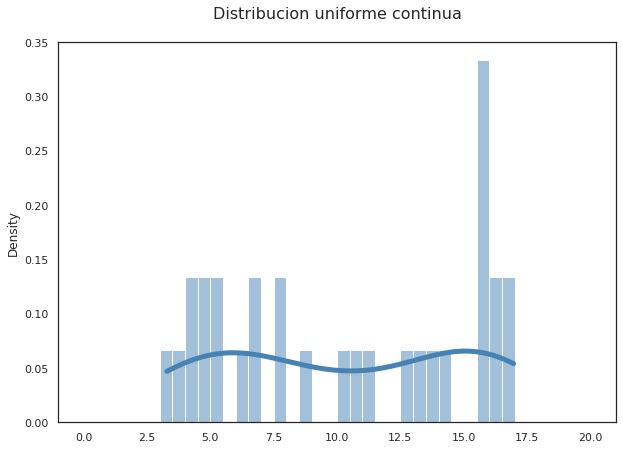

In [39]:
print(random_uniform_cont_data)
distribution_plotter(random_uniform_cont_data, "uniforme continua", binrange=(0,20))

[14 12  9  8 13  9 11  3  8 13 11  7  9  6  3 10 14 11 11  5 10  8 12  4
  8  4  5 13 14 10]


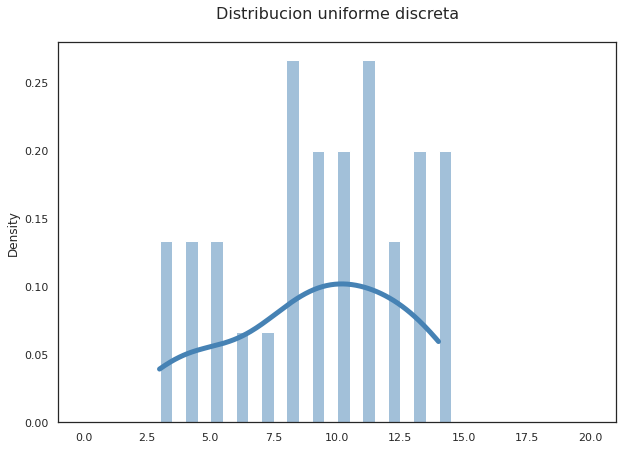

In [40]:
print(random_uniform_disc_data)

distribution_plotter(random_uniform_disc_data, "uniforme discreta", bins=possible_values, binrange=(0,20))

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Estas distribuciones se parecen?</label></div>
</div>

<div id="caja2" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Prueben ahora generando, 100, 1000, 10000 y 100000 datos y comparen los gráficos. ¿Qué pueden concluir?</label></div>
</div>



In [6]:
random_generator = np.random.default_rng()
random_uniform_cont_data = random_generator.uniform(low = 3, high = 17, size = 1000)

possible_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random_uniform_disc_data = random_generator.choice(possible_values, size = 100)

[13.20627502 16.81129786 13.3348884   4.63698964  8.05818427  8.435427
  9.23133642 15.9665143   9.70788347 11.14250126  9.36169296 16.7859238
  5.74999209 11.8335063  16.56703556  4.51140043 15.56449213 11.08623478
  4.26997909  3.75900898  7.92083085 10.62081056 16.52264882 13.92094737
 12.68952902 16.24678189 12.18484687  5.11699898  5.02536829 10.7541063
  5.43661518  9.35359187 14.32722633 12.91459015 13.680212    8.24157982
  4.71376176  3.66067405 16.79130325 12.7351784   4.21478336  6.64634819
  5.47188417  8.53856666 16.39550765 12.41108716  8.67350951  9.83004947
 13.44105392 15.05542578 12.24043349 16.91961539  4.02047882 15.31237747
  4.93531724  6.35204349 13.04485685  5.13686347 14.72839899  5.78910908
  6.58281689  9.28013573  8.23909842 12.21711981  8.61409823 15.03835916
 15.81529805  7.0090927   7.07925893  8.72887419 15.03650095  3.75148018
  5.59659469  3.32121791 11.29062821 10.4481053   9.38054384  8.56896569
  8.39165394  5.09817546 13.97792035  6.58315521 16.254

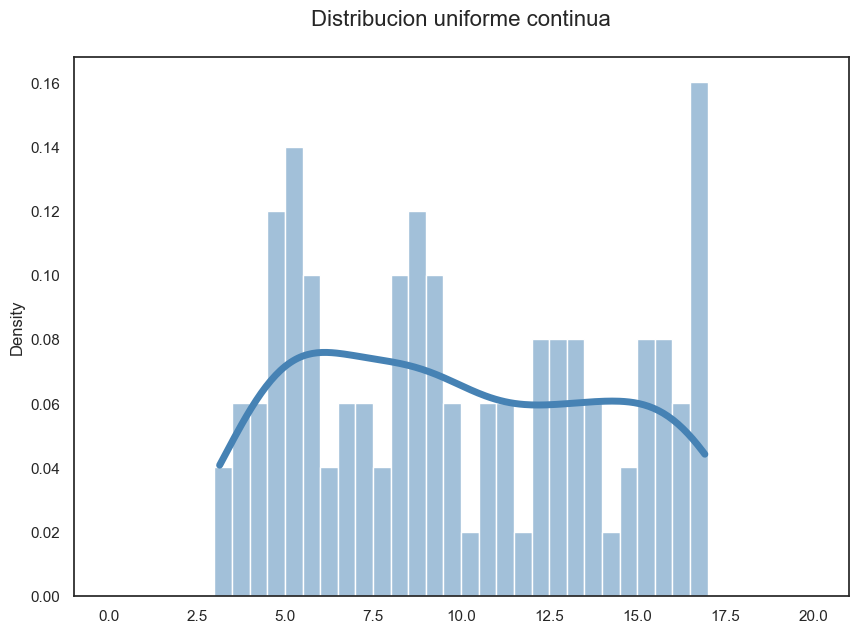

In [5]:
print(random_uniform_cont_data)
distribution_plotter(random_uniform_cont_data, "uniforme continua", binrange=(0,20))

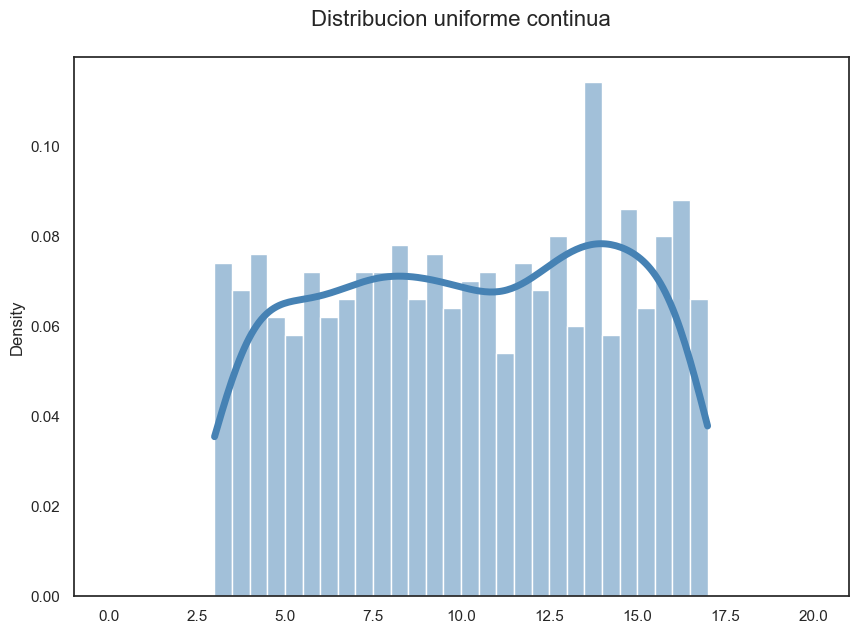

In [7]:

distribution_plotter(random_uniform_cont_data, "uniforme continua", binrange=(0,20))

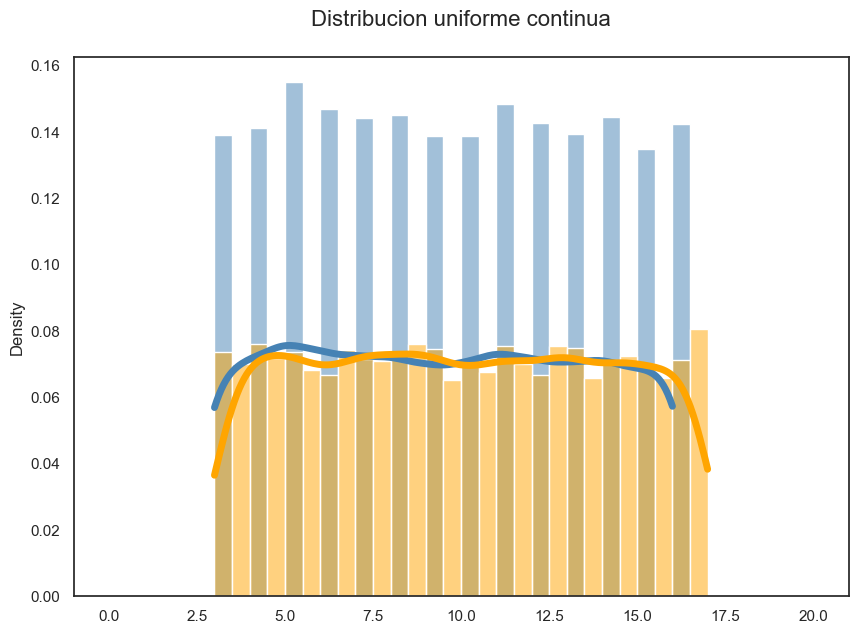

In [8]:
# modificar este valor:
size_sample = 10000

random_uniform_cont_data = random_generator.uniform(low = 3, high = 17, size = size_sample)

possible_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random_uniform_disc_data = random_generator.choice(possible_values, size = size_sample)

distribution_plotter(random_uniform_disc_data, "uniforme discreta", binrange=(0,20))
distribution_plotter(random_uniform_cont_data, "uniforme continua", binrange=(0,20), color="orange")

#### Referencias

Gráficos: https://en.wikipedia.org/wiki/List_of_probability_distributions